In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ddos-dataset/final_unbalanced.csv
/kaggle/input/ddos-dataset/final_balanced.csv


In [2]:
df = pd.read_csv('/kaggle/input/ddos-dataset/final_balanced.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2549288 entries, 0 to 2549287
Data columns (total 73 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Unnamed: 0         int64  
 1   Flow ID            object 
 2   Src IP             object 
 3   Src Port           int64  
 4   Dst IP             object 
 5   Dst Port           int64  
 6   Protocol           int64  
 7   Timestamp          object 
 8   Flow Duration      int64  
 9   Tot Fwd Pkts       int64  
 10  Tot Bwd Pkts       int64  
 11  TotLen Fwd Pkts    float64
 12  TotLen Bwd Pkts    float64
 13  Fwd Pkt Len Max    float64
 14  Fwd Pkt Len Min    float64
 15  Fwd Pkt Len Mean   float64
 16  Fwd Pkt Len Std    float64
 17  Bwd Pkt Len Max    float64
 18  Bwd Pkt Len Min    float64
 19  Bwd Pkt Len Mean   float64
 20  Bwd Pkt Len Std    float64
 21  Flow Byts/s        float64
 22  Flow Pkts/s        float64
 23  Flow IAT Mean      float64
 24  Flow IAT Std       float64
 25  Flow IAT Max      

# Random Forest (7/3) Balanced Dataset with diff parameters

In [3]:
# Encoded the categorical, object variables
from sklearn import preprocessing

for f in df.columns:
    if df[f].dtype == "object":
        label = preprocessing.LabelEncoder()
        label.fit(list(df[f].values))
        df[f] = label.transform(list(df[f].values))

In [4]:
df = df.astype(float)

In [5]:
df.head()

,Unnamed: 0,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,624.0,1353186.0,9371.0,4504.0,9823.0,80.0,6.0,24512.0,3974862.0,29.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,625.0,1353186.0,9371.0,4504.0,9823.0,80.0,6.0,24513.0,63.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,626.0,1353187.0,9371.0,4505.0,9823.0,80.0,6.0,24513.0,476078.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,627.0,1353187.0,9371.0,4505.0,9823.0,80.0,6.0,24514.0,151.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,628.0,1353188.0,9371.0,4506.0,9823.0,80.0,6.0,24514.0,472507.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [6]:
df.isna().sum()

Unnamed: 0    0
Flow ID       0
Src IP        0
Src Port      0
Dst IP        0
             ..
Idle Mean     0
Idle Std      0
Idle Max      0
Idle Min      0
Label         0
Length: 73, dtype: int64

In [7]:
df.isnull().sum()

Unnamed: 0    0
Flow ID       0
Src IP        0
Src Port      0
Dst IP        0
             ..
Idle Mean     0
Idle Std      0
Idle Max      0
Idle Min      0
Label         0
Length: 73, dtype: int64

In [8]:
df.drop(["Unnamed: 0"], axis=1, inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2549288 entries, 0 to 2549287
Data columns (total 72 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Flow ID            float64
 1   Src IP             float64
 2   Src Port           float64
 3   Dst IP             float64
 4   Dst Port           float64
 5   Protocol           float64
 6   Timestamp          float64
 7   Flow Duration      float64
 8   Tot Fwd Pkts       float64
 9   Tot Bwd Pkts       float64
 10  TotLen Fwd Pkts    float64
 11  TotLen Bwd Pkts    float64
 12  Fwd Pkt Len Max    float64
 13  Fwd Pkt Len Min    float64
 14  Fwd Pkt Len Mean   float64
 15  Fwd Pkt Len Std    float64
 16  Bwd Pkt Len Max    float64
 17  Bwd Pkt Len Min    float64
 18  Bwd Pkt Len Mean   float64
 19  Bwd Pkt Len Std    float64
 20  Flow Byts/s        float64
 21  Flow Pkts/s        float64
 22  Flow IAT Mean      float64
 23  Flow IAT Std       float64
 24  Flow IAT Max       float64
 25  Flow IAT Min      

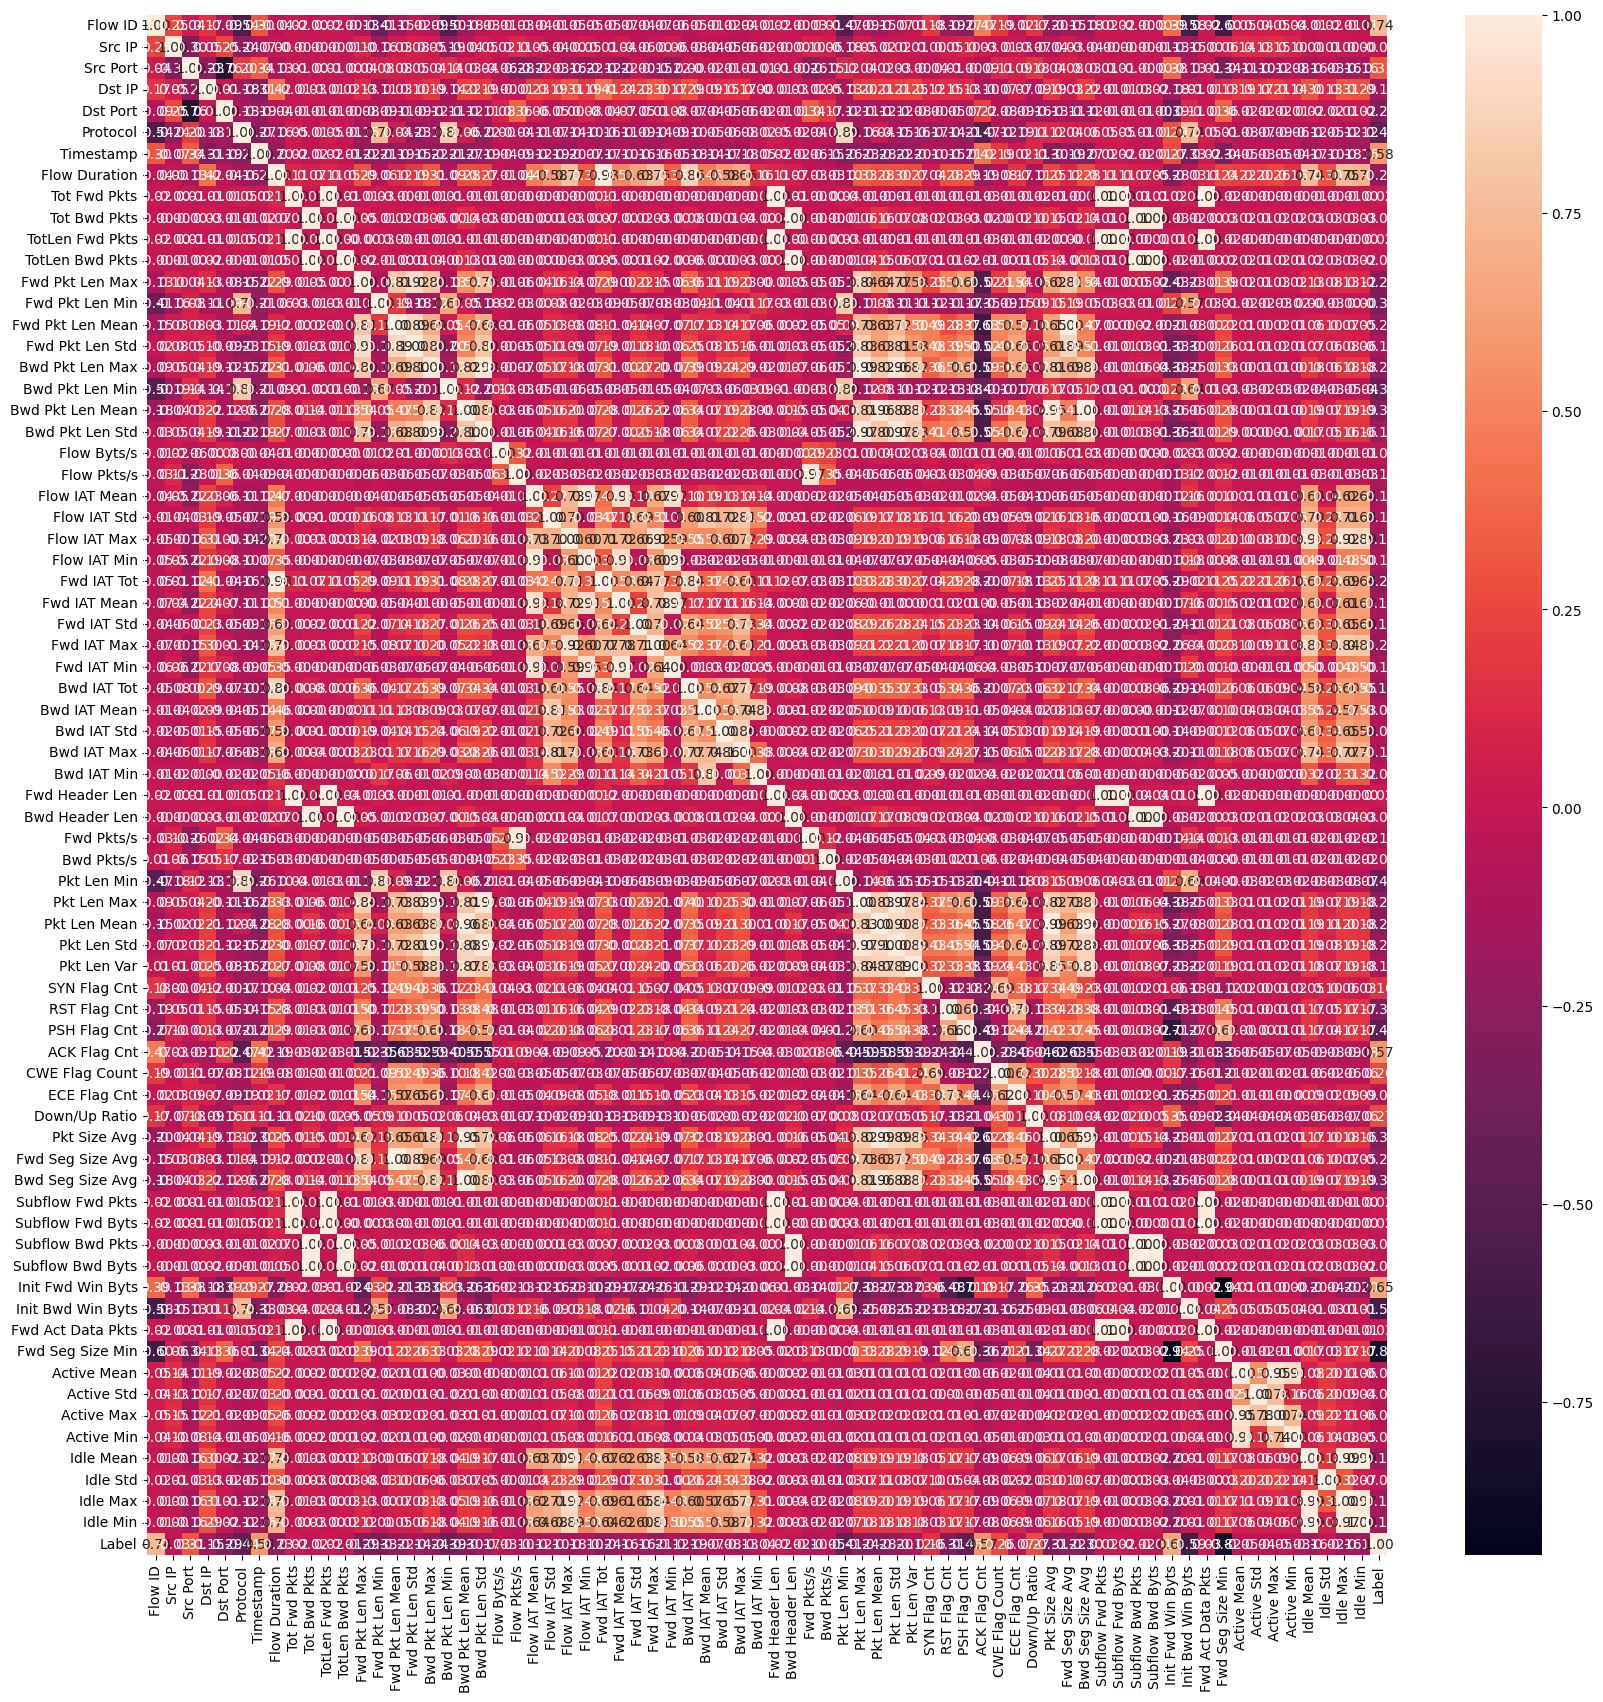

In [26]:
# Draw heatmap to see the correlation between the features
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(), annot=True, fmt=".2f")
plt.show()

## Split data into train set and test set (7/3)

In [10]:
# Take features and target variables
y = df['Label']
X = df.drop(['Label'], axis=1, inplace=False)

print(X.shape)
print(y.shape)

(2549288, 71)
(2549288,)


In [11]:
TEST_SIZE = 0.3
RANDOM_STATE = 42

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE
)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1784501, 71)
(1784501,)
(764787, 71)
(764787,)


## Define grid search and train model, find best match`

In [12]:
# Define grid search parameters for Random Forest
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

CROSS_VALIDATION = 3
VERBOSE = 4

rf = RandomForestClassifier(random_state=RANDOM_STATE)

param_grid = {
    "n_estimators": [50, 100],
    "max_features": ["sqrt", "log2"],
    "criterion": ["gini", "entropy"],
    "max_depth": [3, 5],
    "max_leaf_nodes": [2, 4],
#     "min_samples_split": [2, 5],
    "min_samples_leaf": [2, 4],
}

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=CROSS_VALIDATION,  # 3-fold cross-validation
    n_jobs=-1,  # Use all cores
    verbose=VERBOSE,  # Prints progress of the GridSearchCV process
    return_train_score=True,
)

In [13]:
# Fit GridSearchCV on the training data
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 64 candidates, totalling 192 fits


/usr/local/lib/python3.10/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


[CV 1/3] END criterion=gini, max_depth=3, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=4, n_estimators=50;, score=(train=0.992, test=0.992) total time= 2.4min
[CV 1/3] END criterion=entropy, max_depth=3, max_features=log2, max_leaf_nodes=4, min_samples_leaf=2, n_estimators=50;, score=(train=0.982, test=0.983) total time= 2.0min
[CV 1/3] END criterion=gini, max_depth=3, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=4, n_estimators=100;, score=(train=0.993, test=0.993) total time= 4.4min
[CV 2/3] END criterion=gini, max_depth=3, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=4, n_estimators=100;, score=(train=0.993, test=0.994) total time= 4.4min
[CV 2/3] END criterion=gini, max_depth=5, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=4, n_estimators=50;, score=(train=0.993, test=0.993) total time= 2.4min
[CV 2/3] END criterion=entropy, max_depth=3, max_features=log2, max_leaf_nodes=4, min_samples_leaf=2, n_estimators=50;, score=(train=0.979, test=0.979) tot

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [3, 5],
                         'max_features': ['sqrt', 'log2'],
                         'max_leaf_nodes': [2, 4], 'min_samples_leaf': [2, 4],
                         'n_estimators': [50, 100]},
             return_train_score=True, verbose=4)

In [14]:
# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Cross-Validation Accuracy Score:", best_score)

Best Parameters: {'criterion': 'gini', 'max_depth': 3, 'max_features': 'sqrt', 'max_leaf_nodes': 4, 'min_samples_leaf': 2, 'n_estimators': 100}
Best Cross-Validation Accuracy Score: 0.9930439934471936


### Prediction with best model

In [15]:
# Get the best model
best_rf = grid_search.best_estimator_

# Make predictions with the best model
y_pred = best_rf.predict(X_test)

In [16]:
y_pred

array([0., 1., 0., ..., 0., 1., 0.])

### Evaluation

In [17]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, classification_report

In [18]:
from sklearn.metrics import classification_report

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

f1score = f1_score(y_test, y_pred)
print("F1-score:", f1score)

pr = precision_score(y_test,y_pred)
print("Precision score:", pr)

rs = recall_score(y_test,y_pred)
print("Recall score:", rs)

# Evaluate the best model
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9935263020945702
F1-score: 0.9935659770007395
Precision score: 0.9875176953201691
Recall score: 0.9996888034623884
[CV 3/3] END criterion=gini, max_depth=5, max_features=log2, max_leaf_nodes=2, min_samples_leaf=4, n_estimators=50;, score=(train=0.956, test=0.956) total time= 1.7min
[CV 3/3] END criterion=entropy, max_depth=3, max_features=sqrt, max_leaf_nodes=2, min_samples_leaf=4, n_estimators=50;, score=(train=0.956, test=0.956) total time= 2.0min
[CV 3/3] END criterion=entropy, max_depth=5, max_features=log2, max_leaf_nodes=2, min_samples_leaf=2, n_estimators=100;, score=(train=0.953, test=0.953) total time= 2.4min
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      0.99      0.99    382392
         1.0       0.99      1.00      0.99    382395

    accuracy                           0.99    764787
   macro avg       0.99      0.99      0.99    764787
weighted avg       0.99      0.99      0.99    764787



### Calculate the samples where the model predicts incorrectly compared to the actual label

In [19]:
misclassified_samples = X_test[y_test != y_pred]
mc = misclassified_samples.shape[0]
print("Misclassified samples number:", mc)

Misclassified samples number: 4951


## Heatmap for GridSearch

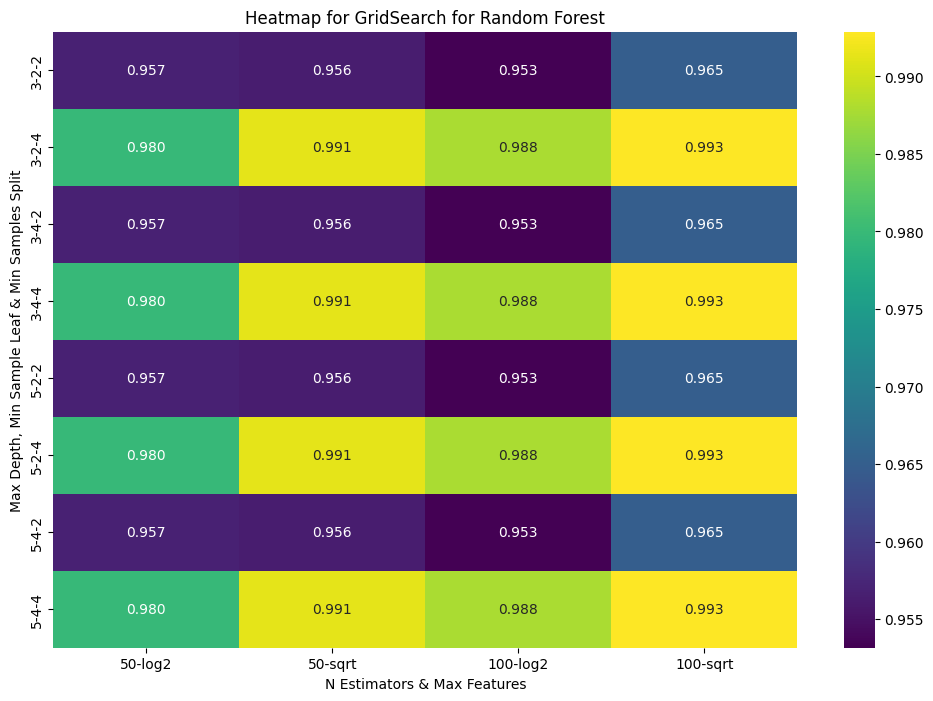

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

results = pd.DataFrame(grid_search.cv_results_)

# Choose important columns
important_columns = ['mean_test_score', 'param_n_estimators', 'param_max_features', 'param_max_depth', 'param_min_samples_leaf', 'param_criterion', 'param_max_leaf_nodes']

filtered_results = results[important_columns]

pivot_table = filtered_results.pivot_table(
    values='mean_test_score',
    index=['param_max_depth', 'param_min_samples_leaf', 'param_max_leaf_nodes'],
    columns=['param_n_estimators', 'param_max_features']
)

# Draw heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, cmap='viridis', fmt=".3f")
plt.title('Heatmap for GridSearch for Random Forest')
plt.xlabel('N Estimators & Max Features')
plt.ylabel('Max Depth, Min Sample Leaf & Min Samples Split')
plt.show()

### LineChart for GridSearch

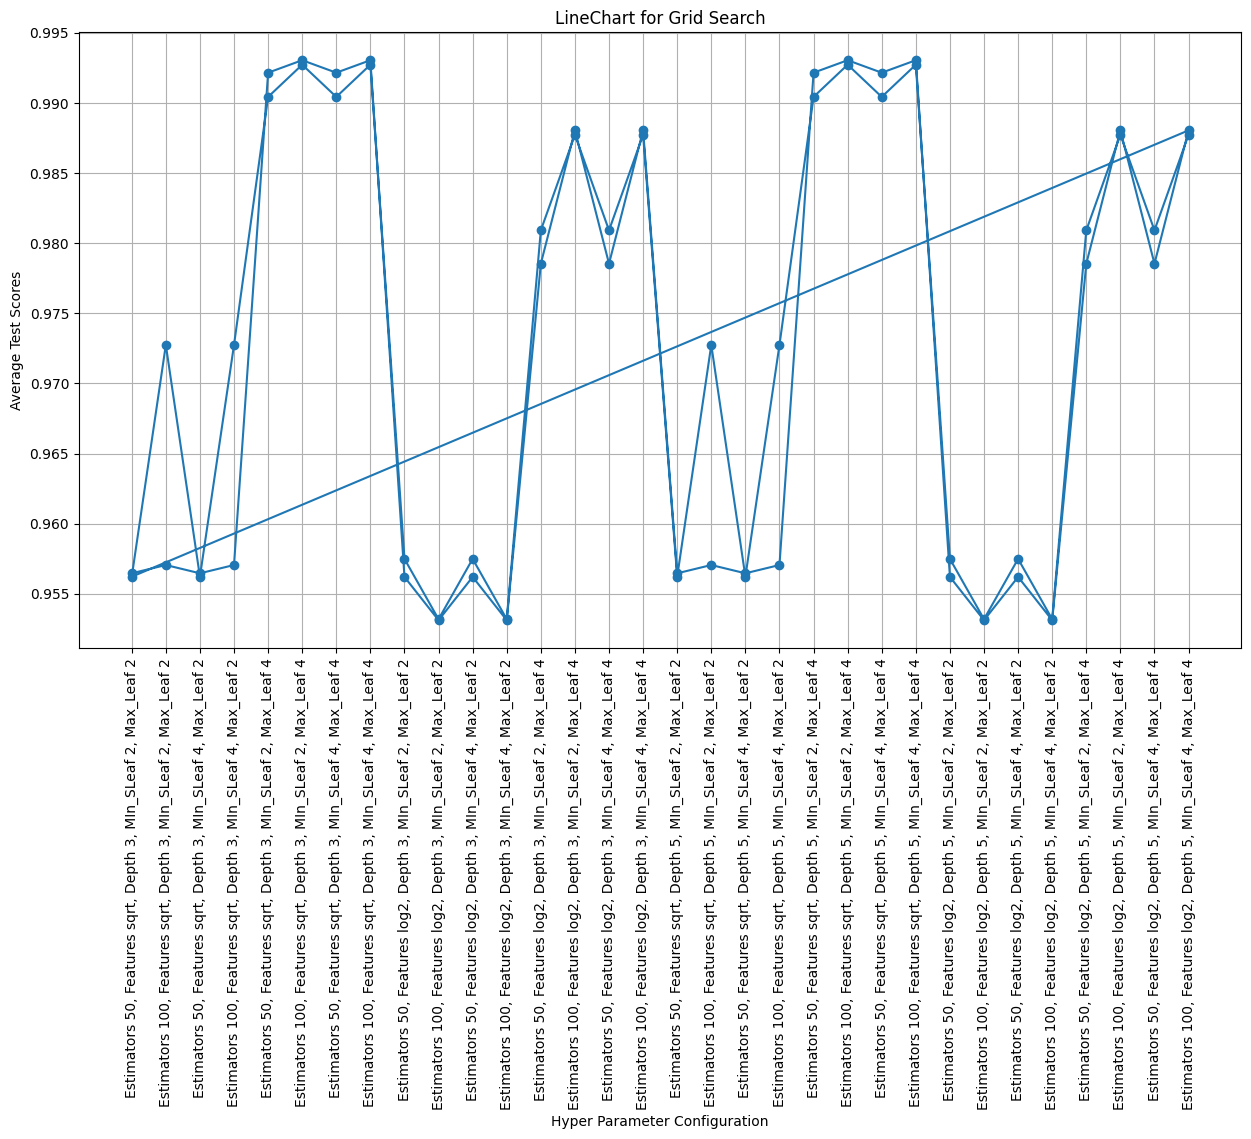

In [22]:
results = pd.DataFrame(grid_search.cv_results_)

results['case'] = results.apply(
    lambda row: f"Estimators {row['param_n_estimators']}, Features {row['param_max_features']}, Depth {row['param_max_depth']}, MIn_SLeaf {row['param_min_samples_leaf']}, Max_Leaf {row['param_max_leaf_nodes']}",
    axis=1
)

plt.figure(figsize=(15, 8))
plt.plot(results['case'], results['mean_test_score'], marker='o')

# Put all tag on X line
plt.xticks(rotation=90)

plt.title('LineChart for Grid Search')
plt.xlabel('Hyper Parameter Configuration')
plt.ylabel('Average Test Scores')
plt.grid(True)
plt.show()

### Draw Decision Tree

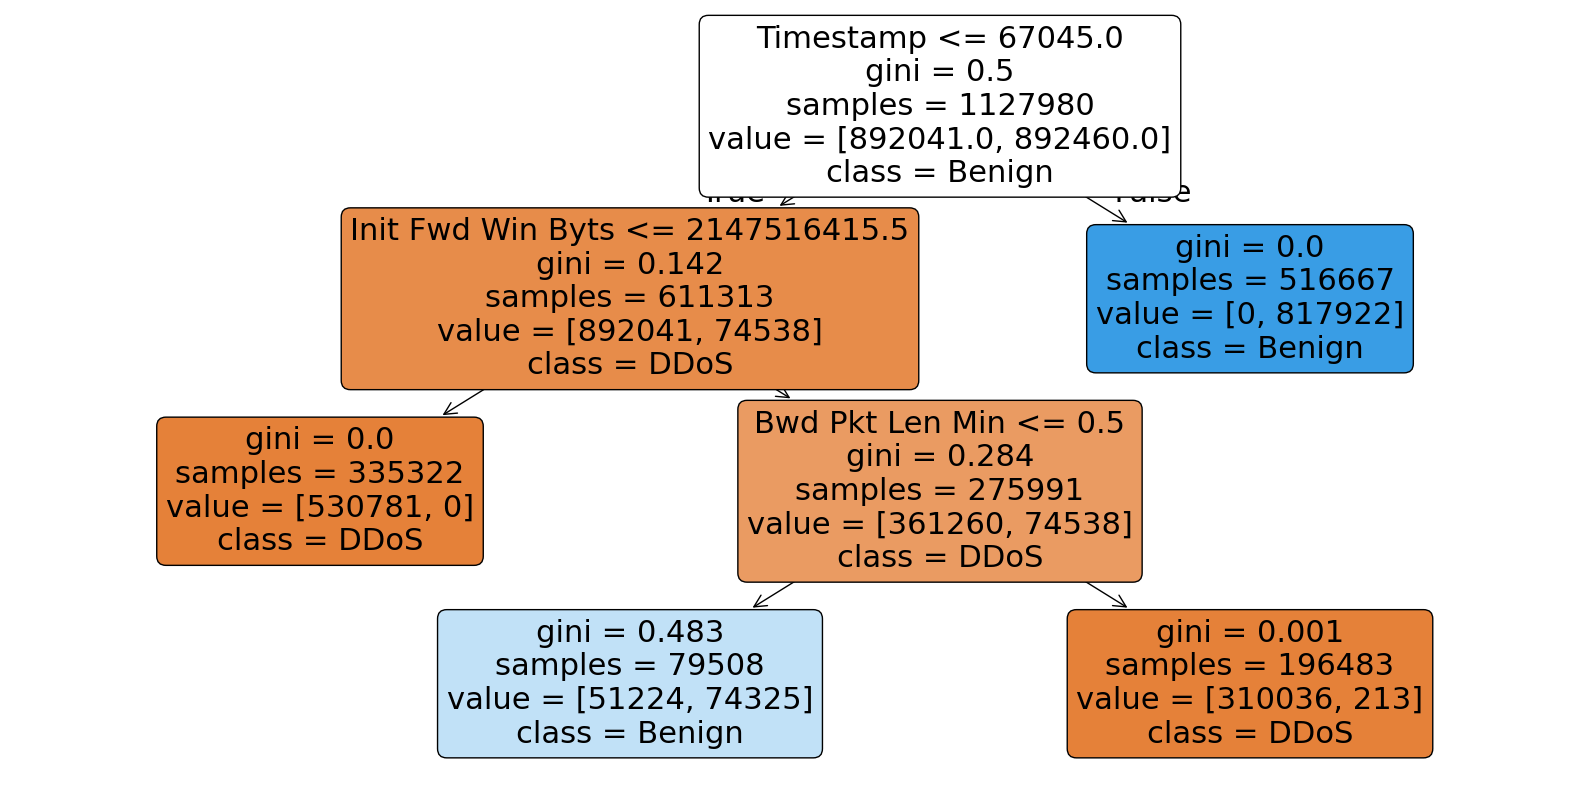

In [23]:
from sklearn import tree
tree_index = 0  # chọn cây đầu tiên
chosen_tree = best_rf.estimators_[tree_index]

# Vẽ cây quyết định
plt.figure(figsize=(20,10))
tree.plot_tree(chosen_tree,
               filled=True,
               rounded=True,
               class_names=["DDoS", "Benign"],
               feature_names=X.columns)
plt.show()

### Confusion Maxtrix

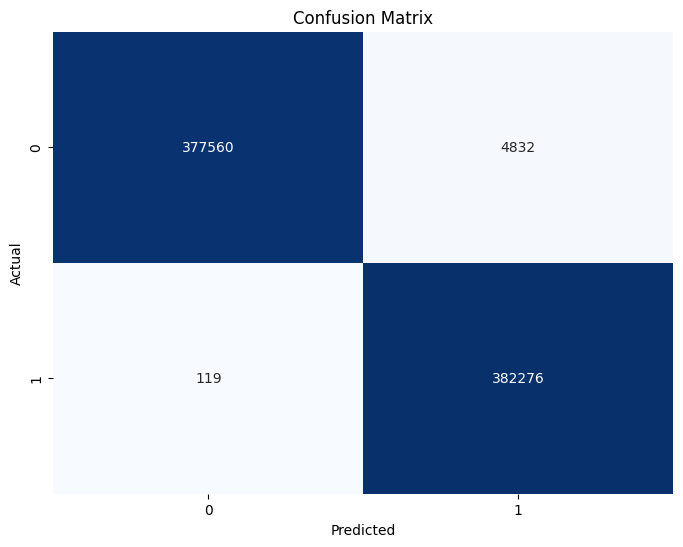

In [24]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

confusion_mtr = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mtr, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### ROC

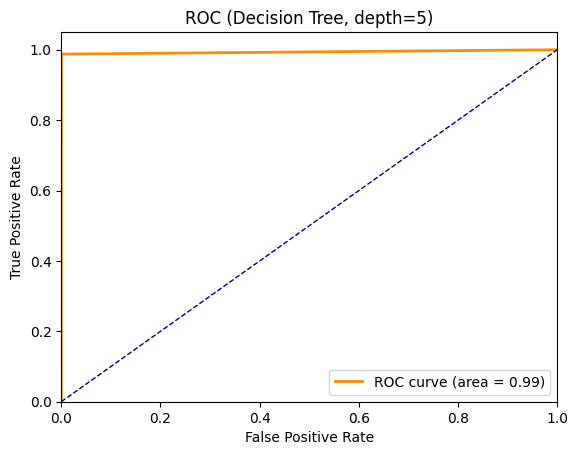

In [25]:
# Vẽ đường cong ROC (Receiver Operating Characteristic)
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_pred, y_test)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC (Decision Tree, depth=5)')
plt.legend(loc="lower right")
plt.show()